In [1]:
import nibabel as nib
from nibabel.processing import resample_to_output
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from glob import glob
import re
import os

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report

seed = 42
np.random.seed(seed)  # for reproducibility
import matplotlib.animation as animation

In [2]:
data_t1 = np.load("/Dedicated/jmichaelson-sdata/comppsych/lesion/Hackathon_Lesion_Data/t1_np_array.npy")
lables_t1 = np.load("/Dedicated/jmichaelson-sdata/comppsych/lesion/Hackathon_Lesion_Data/t1_labels.npy")

(81, 182, 218, 182)


<IPython.core.display.Javascript object>


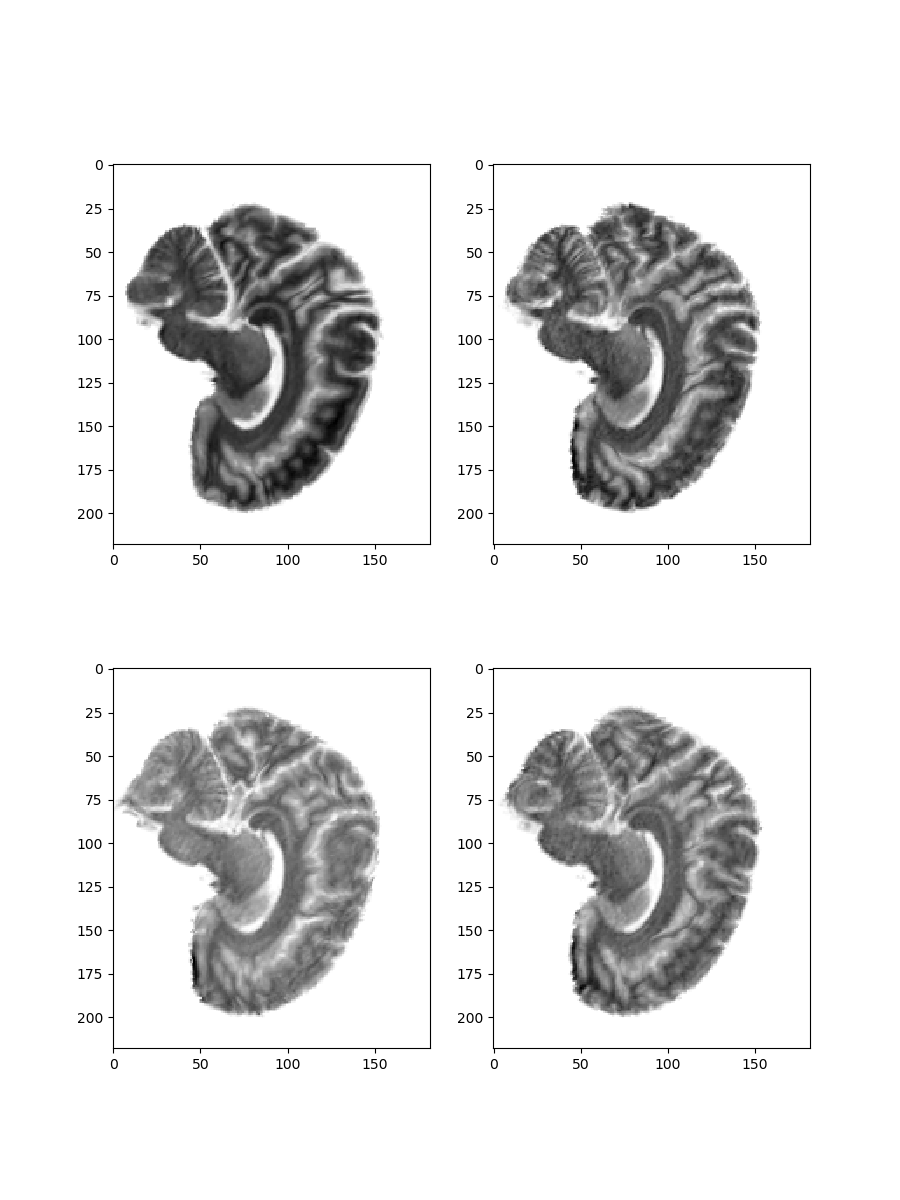

In [8]:
%matplotlib notebook
print(data_t1.shape)

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.imshow(data_t1[2*i,80,:,:], cmap='gray_r')

In [9]:
data_array_mask = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_LM_np_array.npy")
labels_array_mask = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_labels.npy")

data_array_flattened = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_LM_np_array_flattened.npy")
labels_array = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_labels.npy")
data_array_flattened_reduced = np.load("/Dedicated/jmichaelson-wdata/mcrichter/HackUiowa2018/DATA/All_subs_405_LM_np_array_flattened_reduced.npy")

In [23]:
def animate_mask_2d(mask, dim):
    %matplotlib notebook
    fig = plt.figure()
    ims = []
    
    for i in range(mask.shape[dim]):
        if dim == 0:
            brain_slice = mask[i,:,:]
        elif dim == 1:
            brain_slice = mask[:,i,:]
        elif dim == 2:
            brain_slice = mask[:,:,i]
        im = plt.imshow(brain_slice, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)
    
    return ani
    # ani.save('dynamic_images.mp4')    

<IPython.core.display.Javascript object>


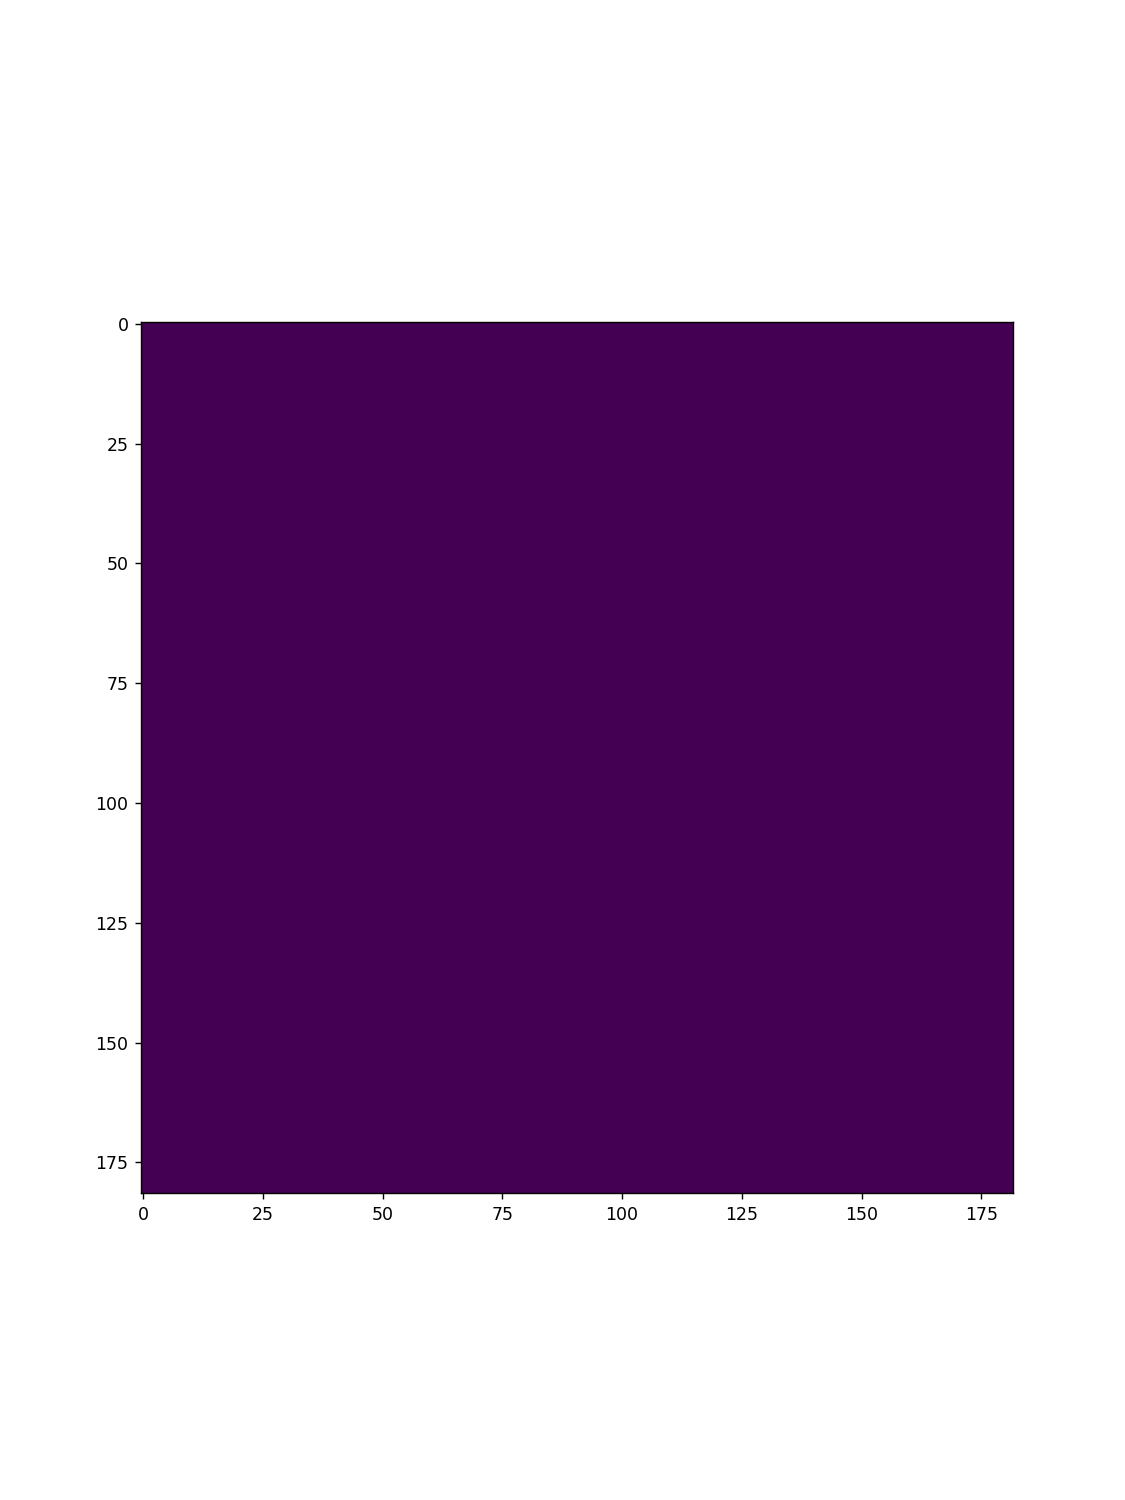

<IPython.core.display.Javascript object>


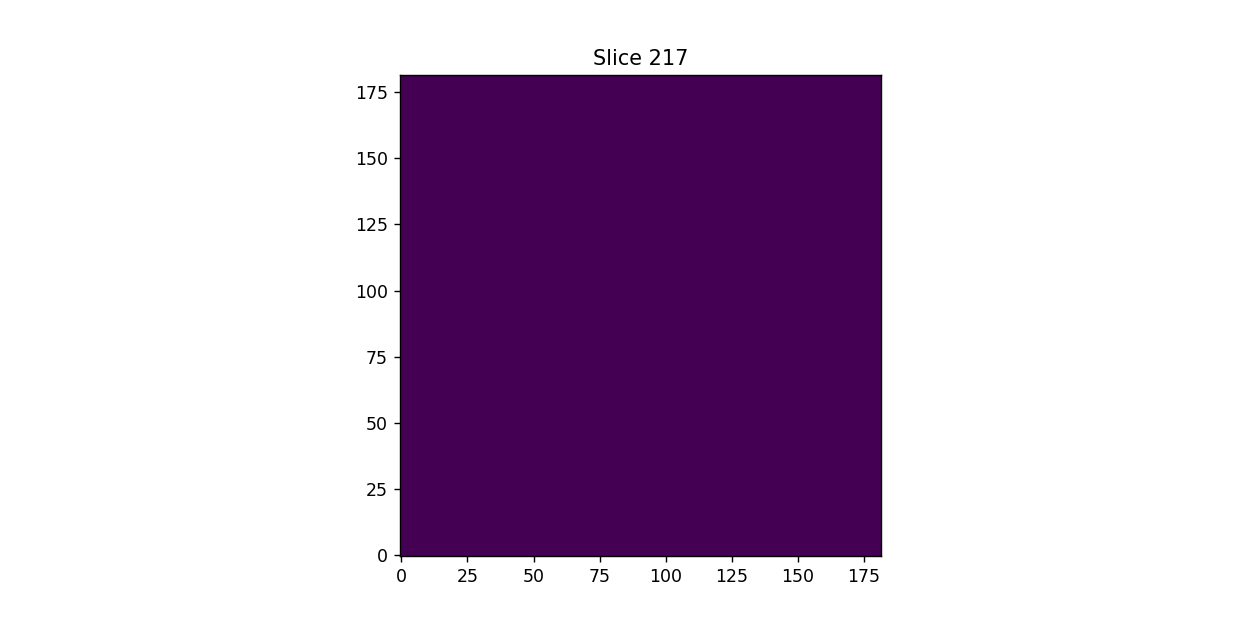

In [10]:
%matplotlib notebook
fig = plt.figure("Lesion mask", figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

image = data_array_mask[0,:,:,:]
for s in range(218):
    ax1.cla()
    ax1.set_title("Slice {}".format(s))
    ax1.imshow(image[:,s,:], origin="lower")


    fig.canvas.draw()

<IPython.core.display.Javascript object>


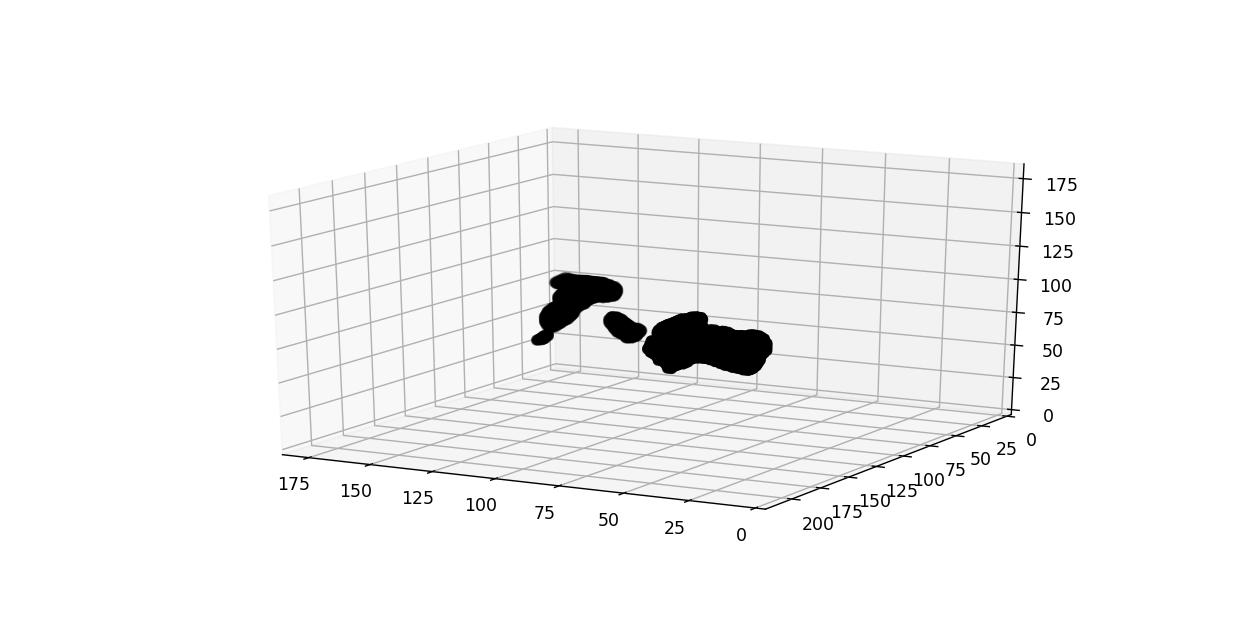

In [11]:
%matplotlib notebook
pos = np.where(image==1)
fig = plt.figure("Lesion mask 3D", figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for angle in range(120):
    ax.cla()
    ax.view_init(20, angle)
    ax.scatter(pos[0], pos[1], pos[2], c='black')
    ax.set_xlim3d(0, 182)
    ax.set_ylim3d(0, 218)
    ax.set_zlim3d(0, 182)
    fig.canvas.draw()

In [42]:
data_array_mask.shape

(405, 182, 218, 182)

In [12]:
all_masks = data_array_mask.sum(axis=0)
all_masks.shape

(182, 218, 182)

<IPython.core.display.Javascript object>


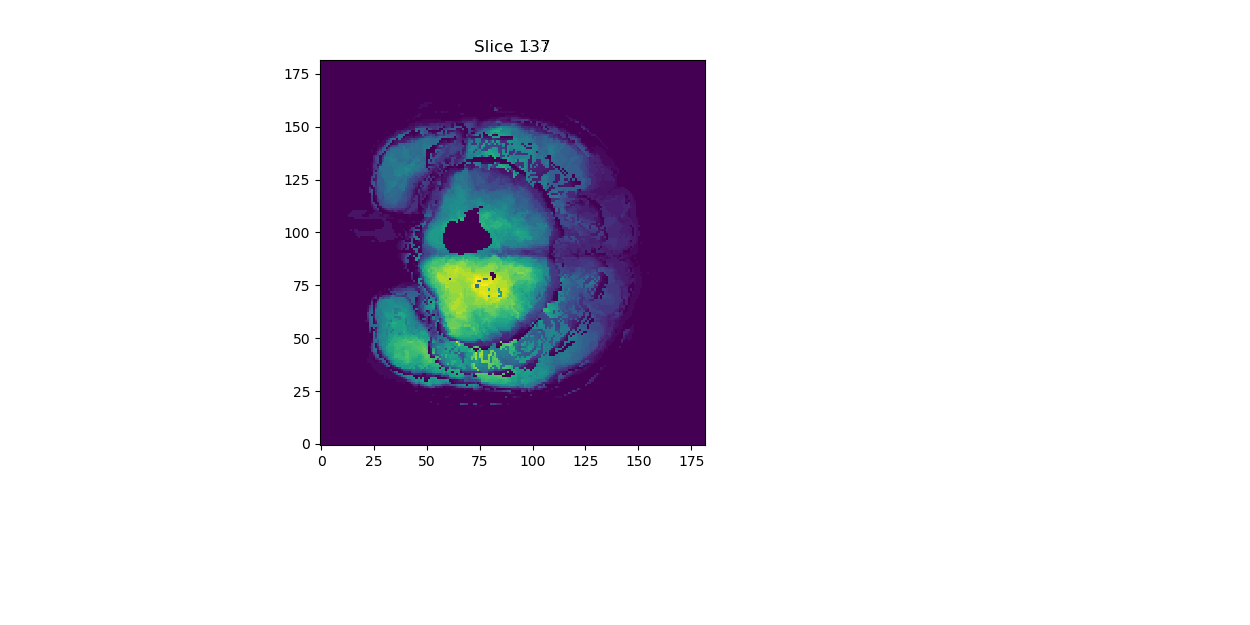

In [17]:
%matplotlib notebook
fig = plt.figure("Lesion mask", figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

for s in range(218):
    ax1.cla()
    ax1.set_title("Slice {}".format(s))
    ax1.imshow(all_masks[:,s,:], origin="lower")


    fig.canvas.draw()

<IPython.core.display.Javascript object>


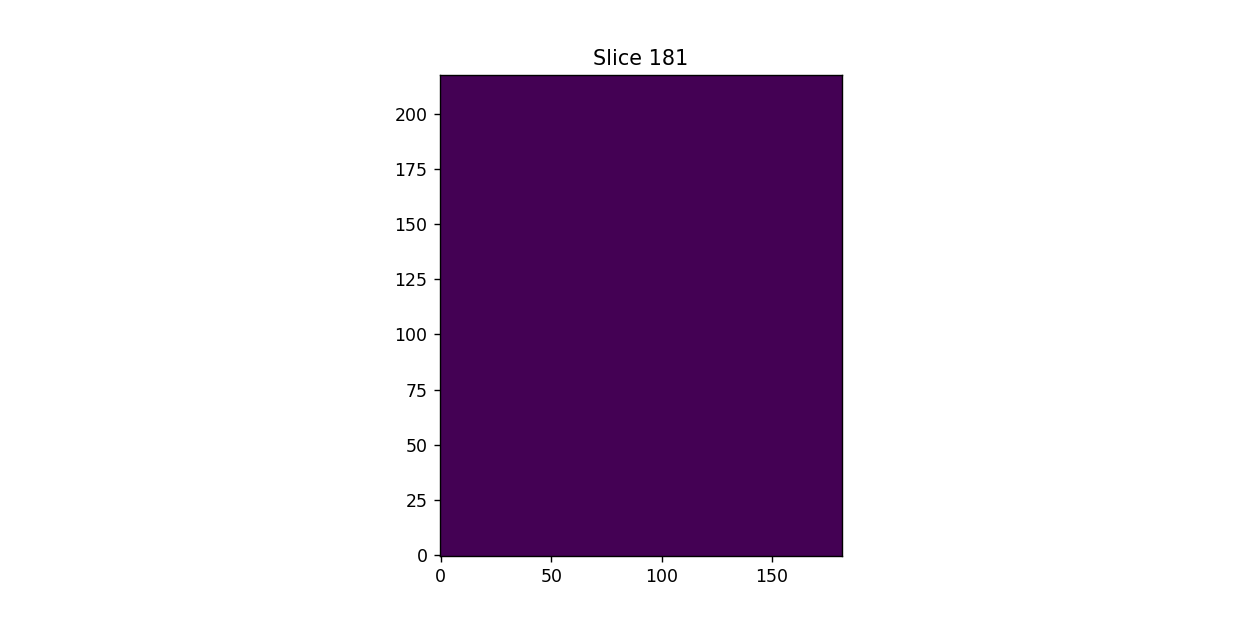

In [18]:
%matplotlib notebook
fig = plt.figure("Lesion mask", figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

for s in range(182):
    ax1.cla()
    ax1.set_title("Slice {}".format(s))
    ax1.imshow(all_masks[s,:,:], origin="lower")


    fig.canvas.draw()

<IPython.core.display.Javascript object>


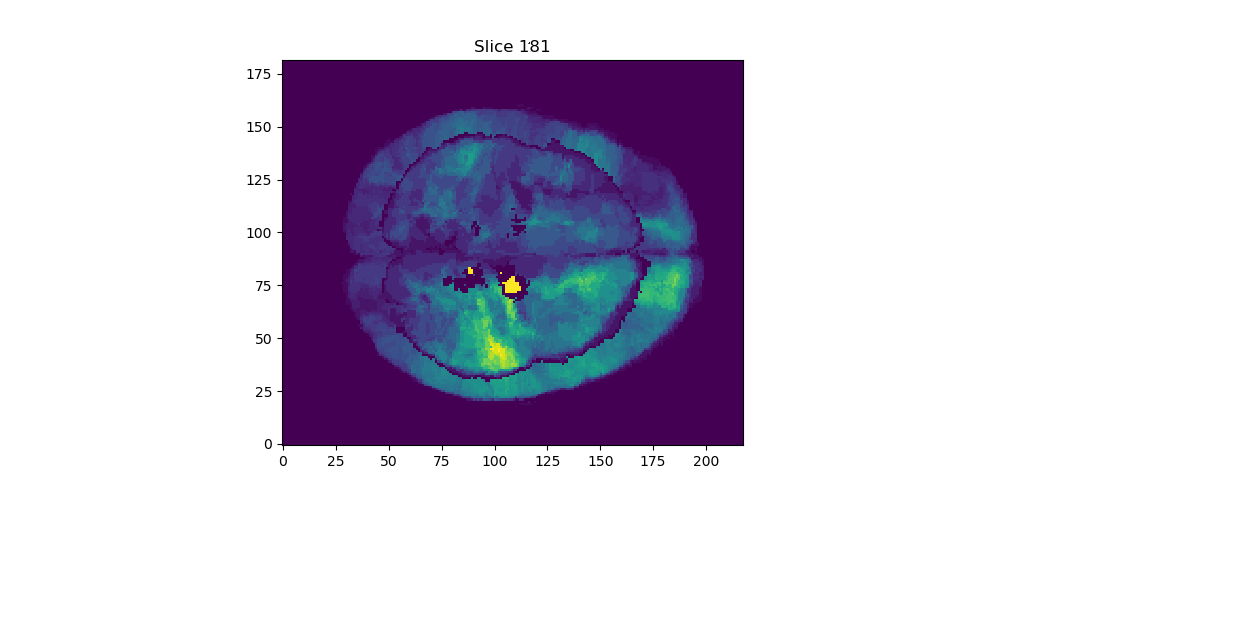

In [15]:
%matplotlib notebook
fig = plt.figure("Lesion mask", figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

for s in range(182):
    ax1.cla()
    ax1.set_title("Slice {}".format(s))
    ax1.imshow(all_masks[:,:,s], origin="lower")


    fig.canvas.draw()

<IPython.core.display.Javascript object>


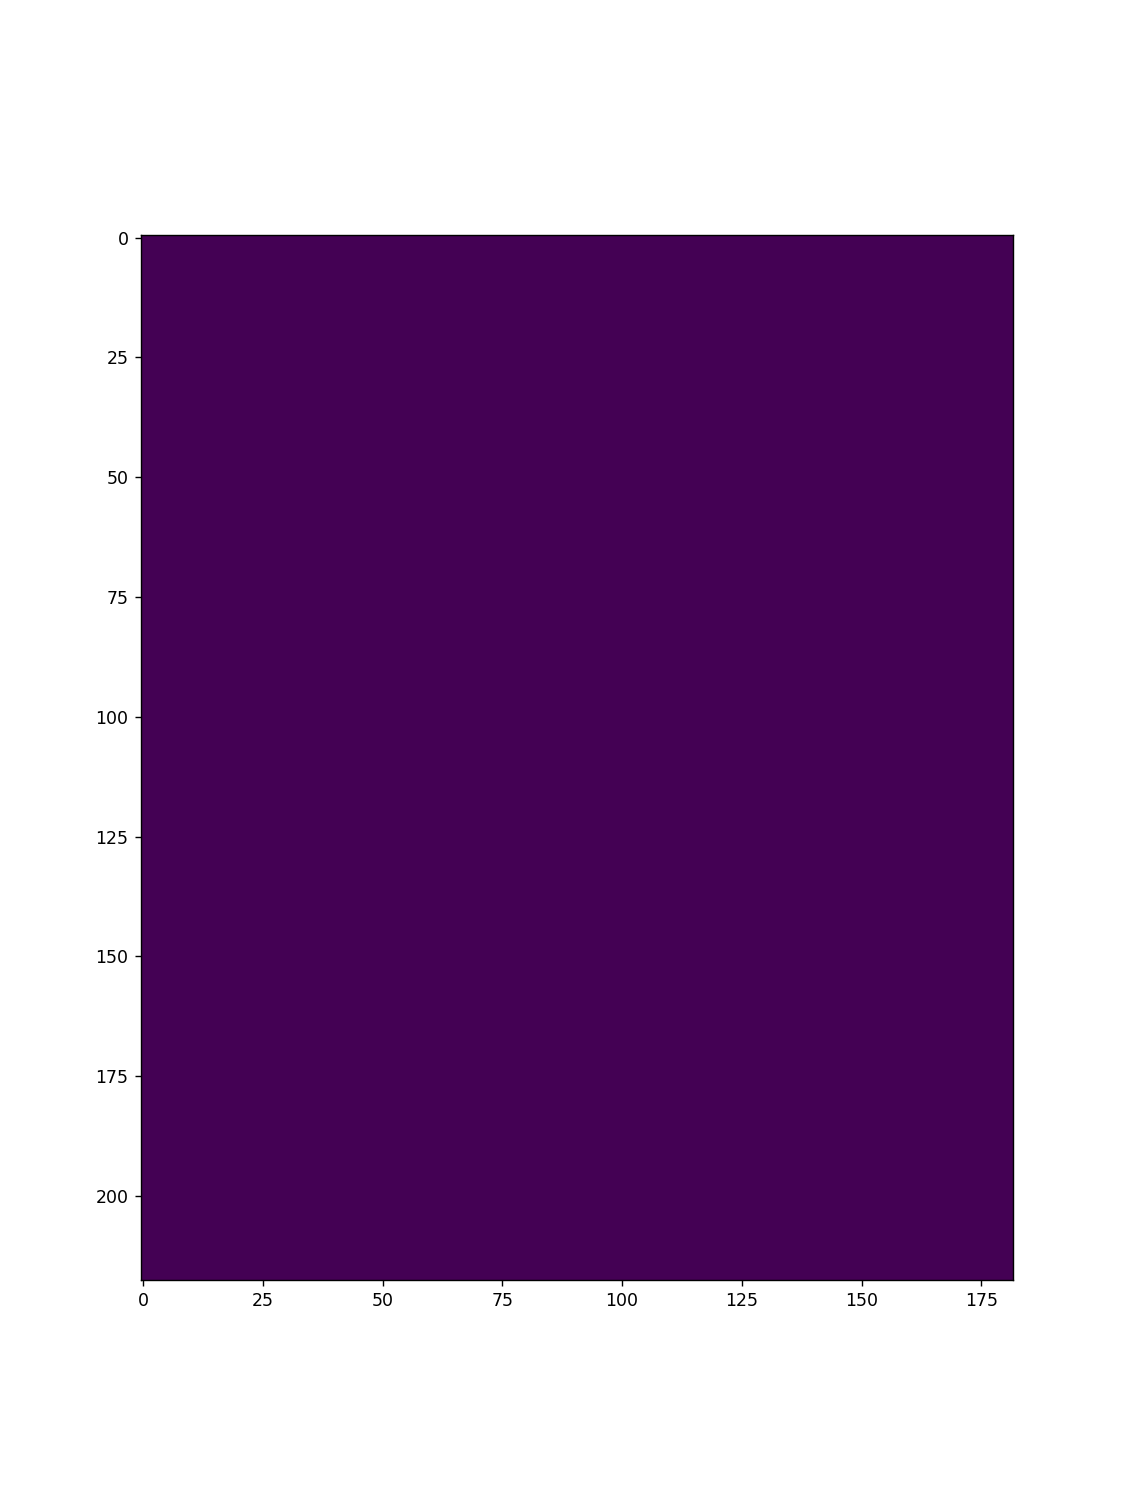

In [33]:
%matplotlib notebook
fig = plt.figure()
ims = []
for i in range(182):
    im = plt.imshow(all_masks[i,:,:], animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
# ani.save('animation_all_masks_sagittal.gif', writer='imagemagick', fps=24)
plt.show()

<IPython.core.display.Javascript object>


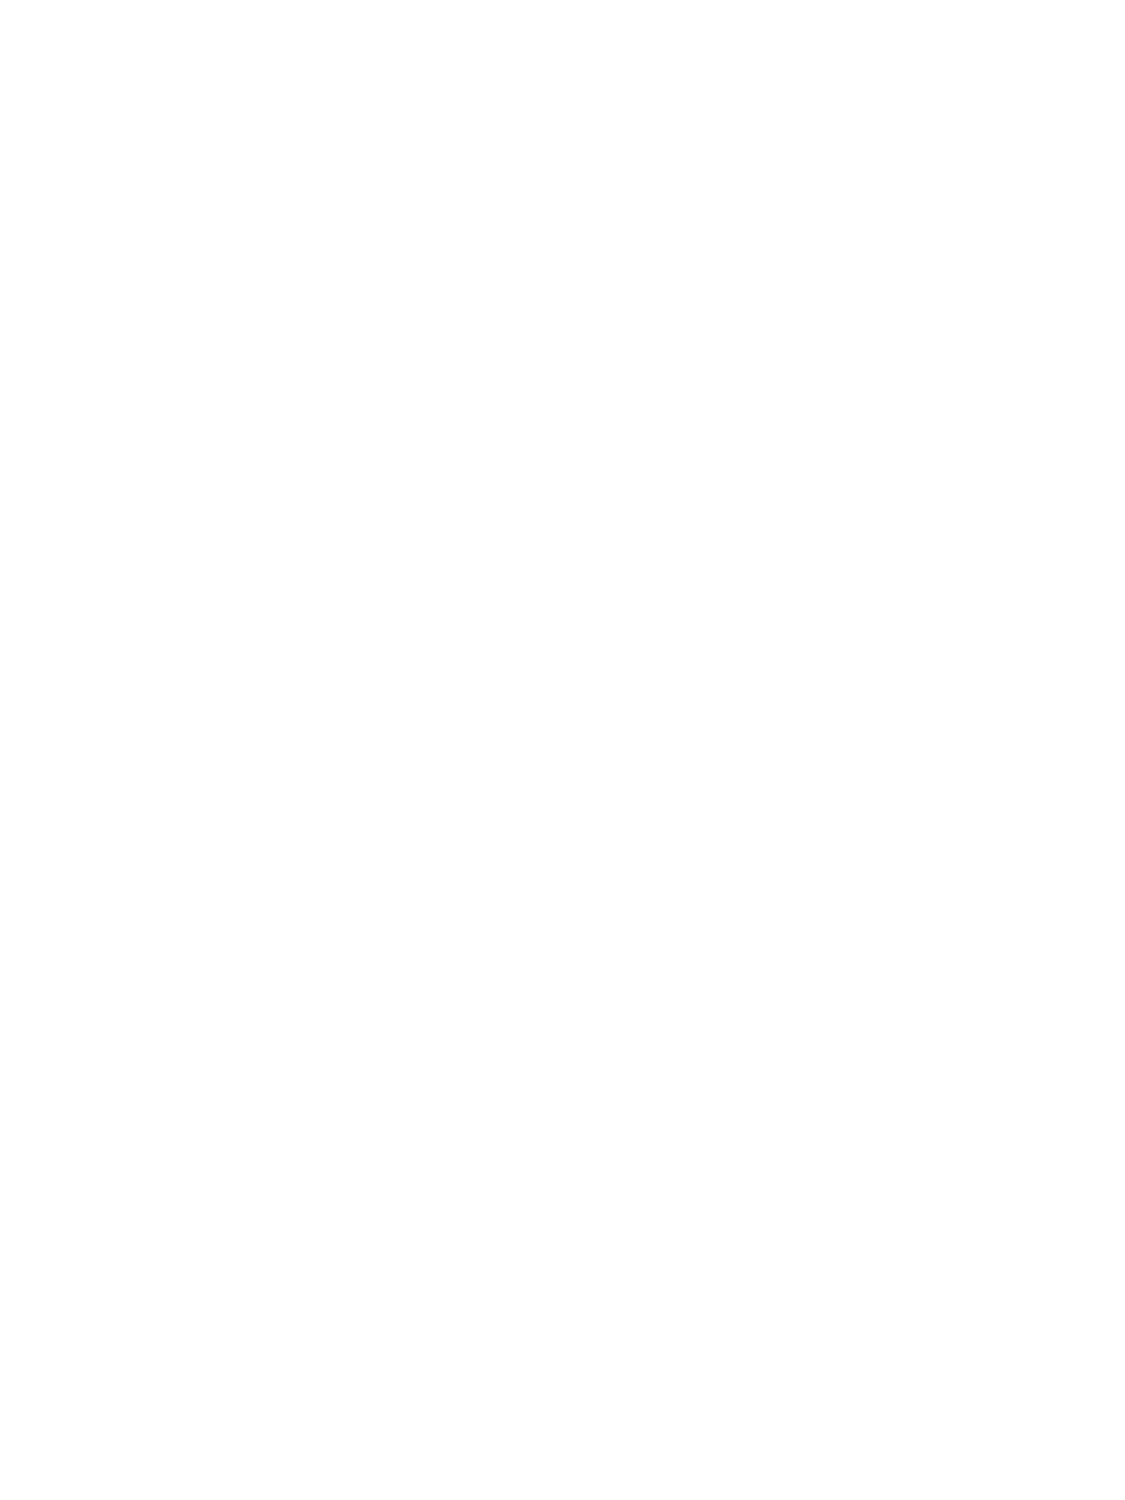

In [34]:
%matplotlib notebook
fig = plt.figure()
ims = []
for i in range(218):
    im = plt.imshow(all_masks[:,i,:], animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
ani.save('animation_all_masks_horizontal.gif', writer='imagemagick', fps=24)
plt.show()

<IPython.core.display.Javascript object>


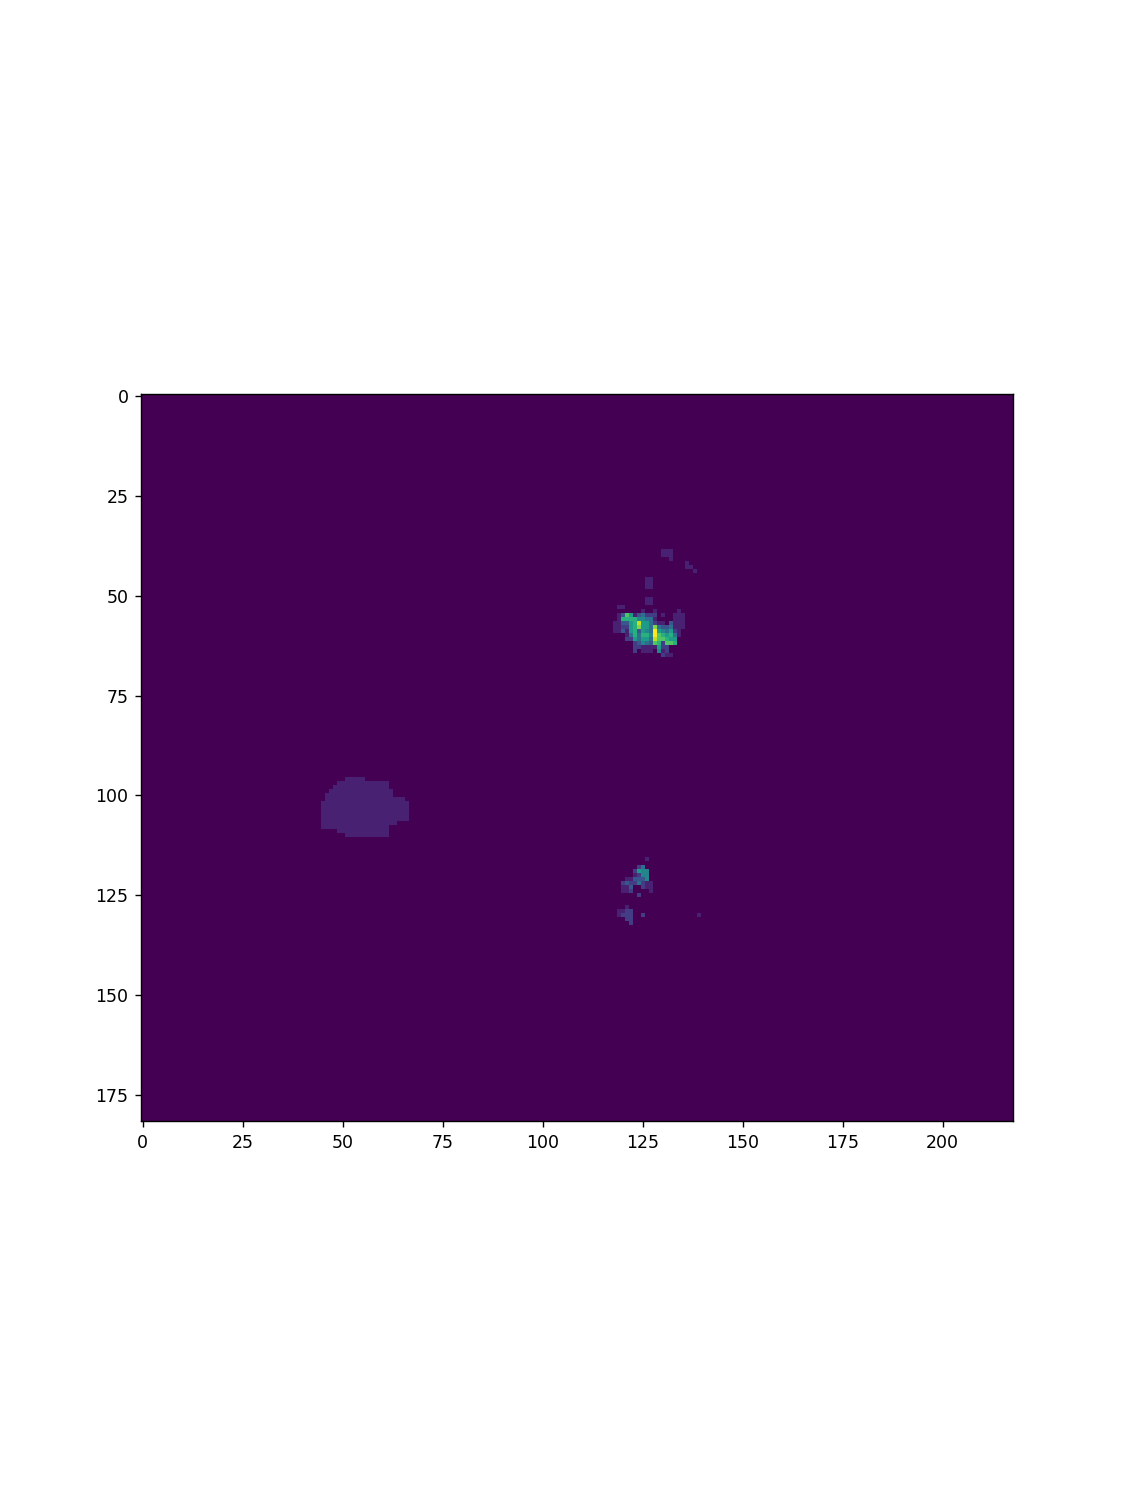

In [35]:
%matplotlib notebook
fig = plt.figure()
ims = []
for i in range(182):
    im = plt.imshow(all_masks[:,:,i], animated=True)
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)
ani.save('animation_all_masks_coronal.gif', writer='imagemagick', fps=24)
plt.show()

<IPython.core.display.Javascript object>


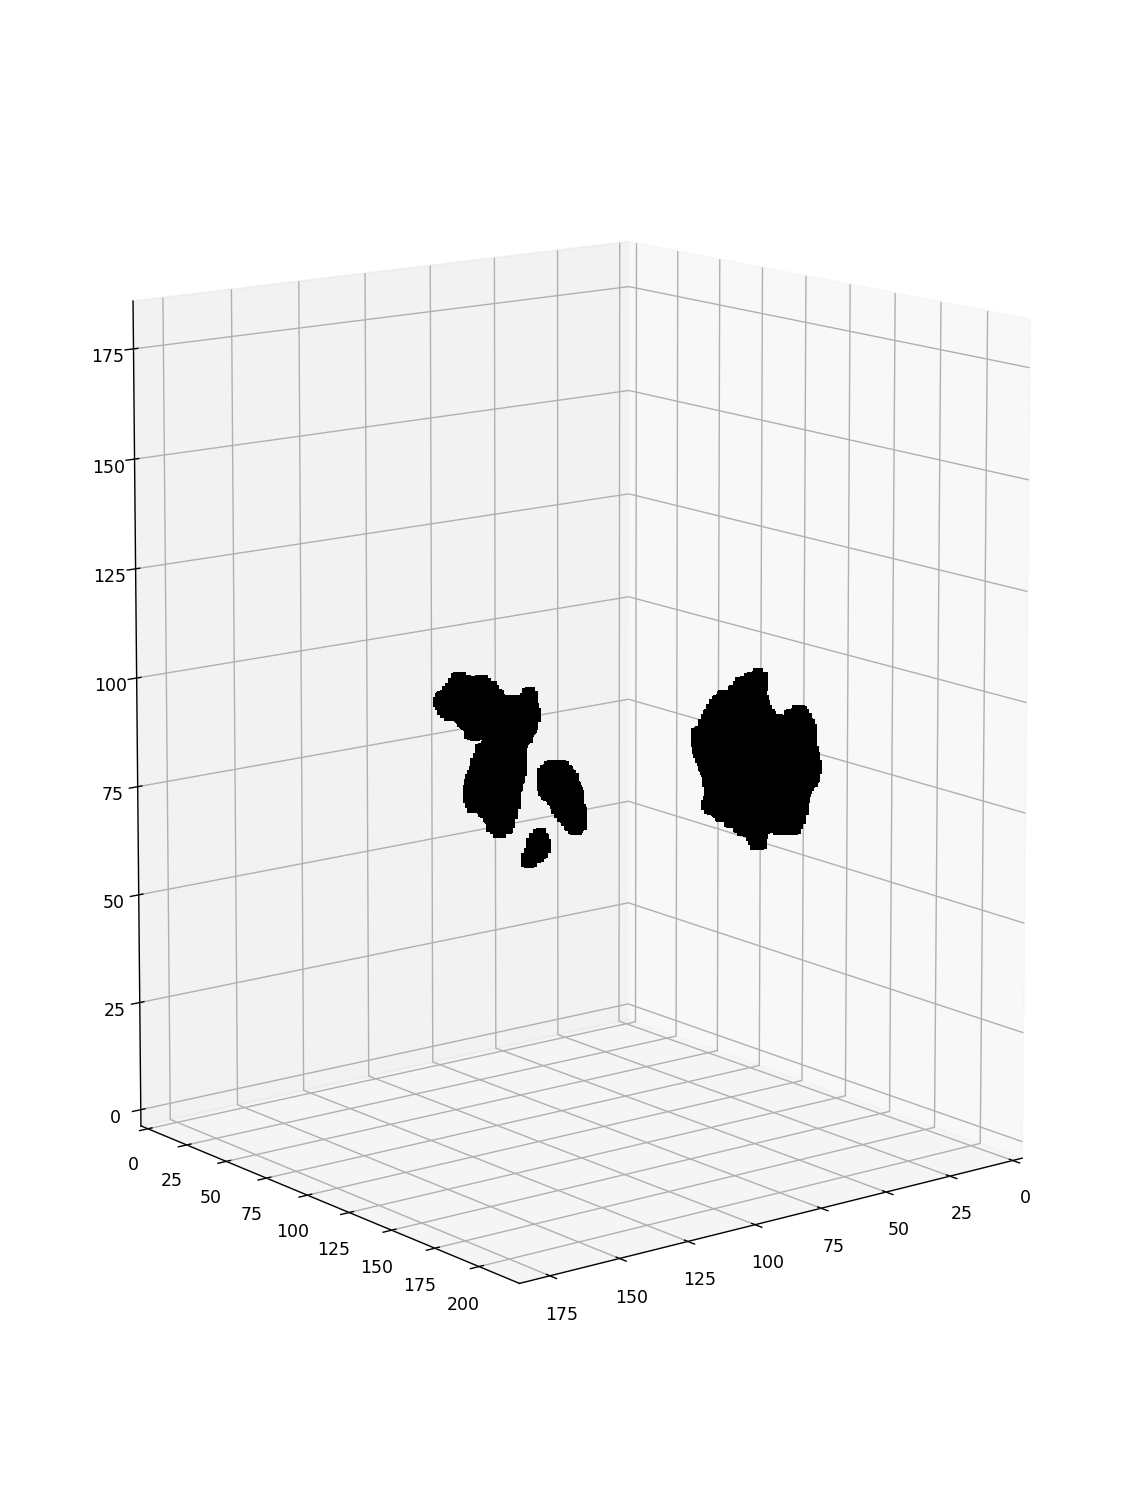

In [41]:
# First import everthing you need
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

def init():
    ax.scatter(pos[0], pos[1], pos[2], c='black', marker='s')
    ax.set_xlim3d(0, 182)
    ax.set_ylim3d(0, 218)
    ax.set_zlim3d(0, 182)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('animation_single_mask_3d.gif', fps=30, writer='imagemagick')
plt.show()

In [ ]:
pos_all = np.where(all_masks > 0)
# First import everthing you need
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

def init():
    ax.scatter(pos_all[0], pos_all[1], pos_all[2], c='black', marker='s')
    ax.set_xlim3d(0, 182)
    ax.set_ylim3d(0, 218)
    ax.set_zlim3d(0, 182)
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('animation_all_mask_3d_basic.gif', fps=30, writer='imagemagick')
plt.show()

<IPython.core.display.Javascript object>